In [67]:
import numpy as np
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
import matplotlib as mpl
import matplotlib.pyplot as plt

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length, petal width
y = (iris["target"] == 2).astype(np.float64) # Iris virginica

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge"))
])
svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [68]:
svm_clf.predict([[5.5, 1.7]])

array([1.])

In [69]:
svm_clf.predict([[1.1, 1]])

array([0.])

In [70]:
# Non linear SVM Classification
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples = 100, noise = 0.15)
polynomial_svm_clf = Pipeline([
    ("poly_features", PolynomialFeatures(degree = 3)),
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge"))
])

polynomial_svm_clf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge'))])

In [71]:
def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

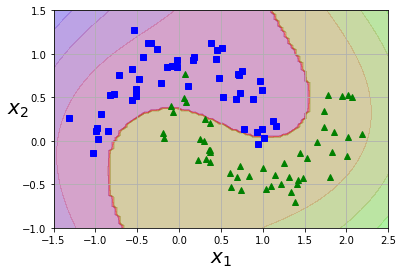

In [72]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.2)

plot_predictions(polynomial_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

plt.show()

In [73]:
# Polynomial Kernel - same result as if you had added many polynomial features, without actually having to add them
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "poly", degree = 10, coef0 = 100, C = 5))
])
poly_kernel_svm_clf.fit(X, y)

In [74]:
plot_predictions(poly_kernel_svm_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [75]:
# Similarity Featrues - add features computed using a similarity function, which measure how much each instance resemble a particular landmark
# - may be computationally expensive to compute all the additional features if large training set


In [76]:
# Gaussian RBF Kernel - kernel trick makes it possible to obtain a similar result as if you had added many similarity features
rbf_kernel_svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(kernel = "rbf", gamma = 5, C = 0.001))
])
rbf_kernel_svm_clf.fit(X, y)
# gamma - if model is overfitting, you should reduce it; if model is underfitting, you should increase it (similar to C hyperparameter)
# kernel - a feature transformation in an (infinite) feature space, similar to polynomial feature transofmration

In [77]:
# LinearSVC, which doesnt support the kernel trick, has a training time complexity of O(m x n) m - instances, n - features

# SVC training time complexity is between O(m**2 x n) and O(m**3 x n).
# It means that is slow for big number of training instances, so its perfect for complex small or medium sized training sets

# SVM Regression - supports linear/nonlinear classification, but also linear/nonlinear regression.
# the trick is to reverse the objective: instead of trying to fit the largest possbile street between two classes
# while limiting margin violations, SVM regression tries to fit as many instances as possible ON the street while limiting violations(instances off the street)
# the width of street is controlleed by a hyperparameter ε (called tol in Scitkit-Learn)
# adding more training instances within the margin does not affect the model's prediction
from sklearn.svm import LinearSVR

svm_reg = LinearSVR(epsilon = 1.5)
svm_reg.fit(X, y)

# to tackle nonlinear regression tasks, you can use kernalized SVM model
from sklearn.svm import SVR

svm_poly_reg = SVR(kernel = "poly", degree = 2, C = 100, epsilon = 0.1)
svm_poly_reg.fit(X, y)

In [78]:
# Exercise 8
lin_svc = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge"))
])

lin_svc.fit(X, y)
plot_predictions(lin_svc, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [79]:
from sklearn.linear_model import SGDClassifier

sgd_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("sgd_clf", SGDClassifier(tol=1e-4))
])

sgd_clf.fit(X, y)
plot_predictions(sgd_clf, [-1.5, 2.5, -1, 1.5])
plot_dataset(X, y, [-1.5, 2.5, -1, 1.5])

In [80]:
# Exercise 9
MNIST_PATH = os.path.join("datasets", "mnist")
csv_path = os.path.join(MNIST_PATH, "train.csv")
mnist_train = pd.read_csv(csv_path)



In [81]:
from sklearn.metrics import accuracy_score


In [82]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(mnist_train.astype(np.float32))

In [ ]:
svm_clf = SVC(gamma="scale", C = 8.5)
svm_clf.fit(X_train_scaled[:10000], y_train[:10000])

y_pred = svm_clf.predict(X_train_scaled)
accuracy_score(y_train, y_pred)

In [ ]:
# from sklearn.model_selection import RandomizedSearchCV
# from scipy.stats import reciprocal, uniform

# param_distributions = {"gamma": reciprocal(0.001, 0.1), "C": uniform(1, 10)}
# rnd_search_cv = RandomizedSearchCV(svm_clf, param_distributions, n_iter=10, verbose=2, cv=3)
# rnd_search_cv.fit(X_train_scaled[:1000], y_train[:1000])

In [ ]:
# rnd_search_cv.best_estimator_.fit(X_train_scaled, y_train)

In [ ]:
import os
import pandas as pd

MNIST_PATH = os.path.join("datasets", "mnist")
csv_path = os.path.join(MNIST_PATH, "test.csv")
mnist_test = pd.read_csv(csv_path)

y_pred = svm_clf.predict(X_test)

In [ ]:
image_id = [i for i in range(1, 28001)]

In [ ]:
submission = pd.DataFrame({
        "ImageId": image_id,
        "Label": y_pred
    })
submission.to_csv('./submission_mnist.csv', index=False)

In [ ]:
mnist_test.shape, X_train.shape, X.shape

In [ ]:
df_describe = pd.DataFrame(y_pred)
df_describe.describe()

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, prediction in zip(axes, X_test, y_pred):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title(f"Prediction: {prediction}")